# Capstone Challenge

The morphometric challenge is to determine how many bacteria colonies are in each of these bacteria colony images. \
The image files are `data/colonies-01.tif`, `data/colonies-02.tif`, and `data/colonies-03.tif`.

In [1]:
#import libraries
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import skimage.filters
import skimage.measure
import skimage.morphology
%matplotlib widget

### Analysis for first image

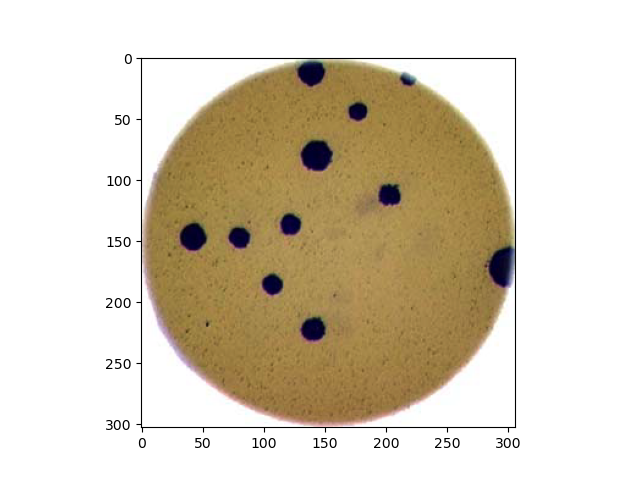

In [2]:
image = skio.imread("data/colonies-01.tif")
plt.subplots()
plt.imshow(image)

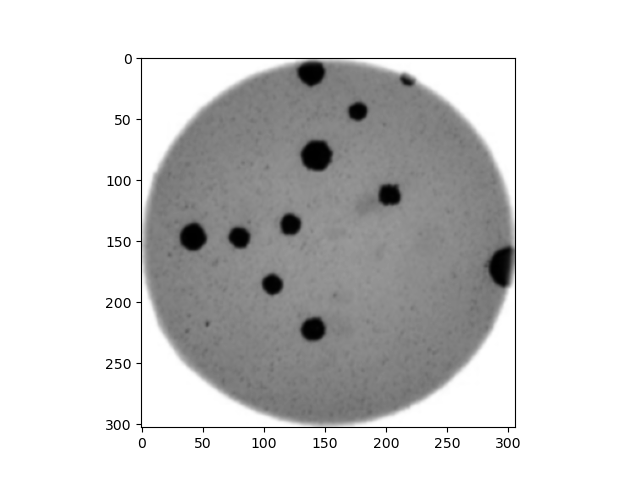

In [3]:
gray_image = skimage.color.rgb2gray(image)
blurred_image = skimage.filters.gaussian(gray_image, sigma = 1.0)
plt.subplots()
plt.imshow(blurred_image, cmap="gray")

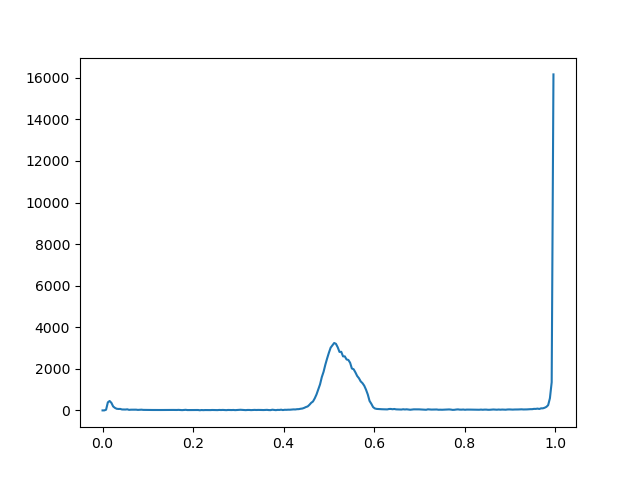

In [4]:
histogram, bin_edges = np.histogram(blurred_image, bins = 256, range=(0.0,1.0))
plt.subplots()
plt.plot(bin_edges[0:-1], histogram)

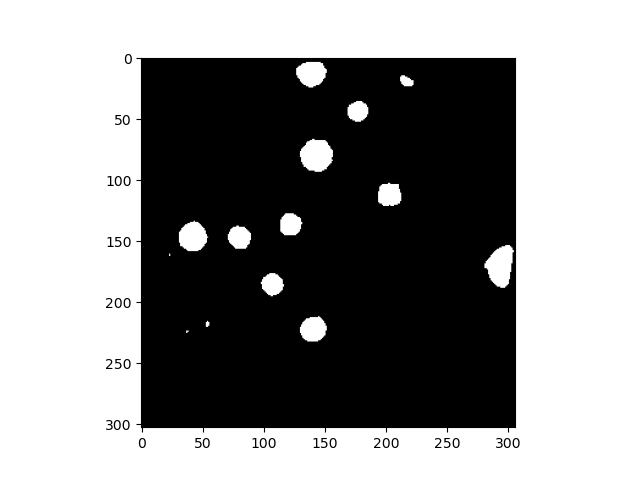

In [5]:
th = 0.4
binary_mask = blurred_image < th
plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [6]:
labeled_image, count = skimage.measure.label(binary_mask, connectivity=2, return_num=True)
print(count)

14


Text(0, 0.5, 'Number of objects')

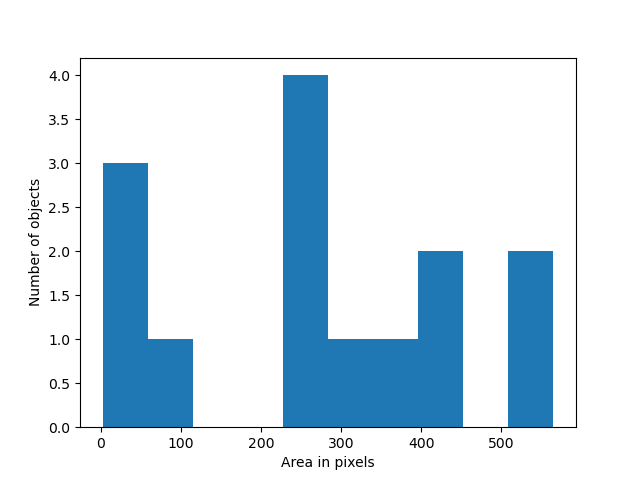

In [7]:
object_features = skimage.measure.regionprops(labeled_image)
object_areas = [feat["area"] for feat in object_features]
plt.subplots()
plt.hist(object_areas)
plt.xlabel("Area in pixels")
plt.ylabel("Number of objects")

In [8]:
object_mask = skimage.morphology.remove_small_objects(binary_mask, 50)
labeled_image, count = skimage.measure.label(object_mask, connectivity=2, return_num=True)
print(count)

11


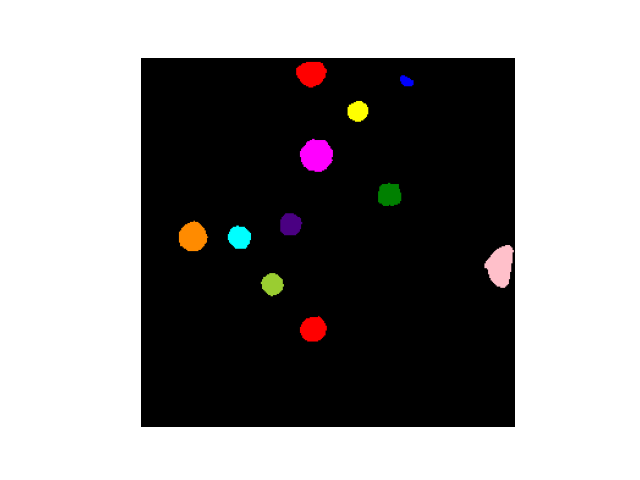

In [9]:
# convert the label image to color image
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)

fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.axis("off");

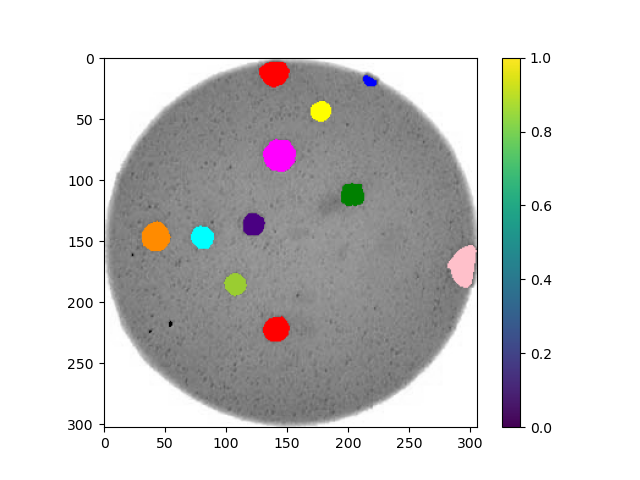

In [10]:
colored_area_image = skimage.color.label2rgb(labeled_image)
final_image = skimage.color.gray2rgb(gray_image)
final_image[binary_mask] = colored_area_image[binary_mask]
plt.figure()
plt.imshow(final_image)
plt.colorbar()

### Creating a UDF to count bacteria colonies

In [42]:
def component_analysis(filename, sigma = 1.0, t = 0.5, connectivity = 2, min_area = 0):
    image = skio.imread(filename)
    gray_image = skimage.color.rgb2gray(image)
    blurred_image = skimage.filters.gaussian(gray_image, sigma = sigma)
    fig, ax =plt.subplots(figsize=(10,5),nrows=1,ncols=2)
    fig.tight_layout(h_pad=10)
    plt.subplots_adjust(top=0.85)
    ax[0].imshow(blurred_image, cmap="gray")
    ax[0].set_title("Blurred Image")
    binary_mask = blurred_image < t
    
    img, cnt = skimage.measure.label(binary_mask, connectivity=2, return_num=True)
    object_features = skimage.measure.regionprops(img)
    object_areas = [feat["area"] for feat in object_features]
    ax[1].hist(object_areas)
    ax[1].set_title("Object Areas")
    ax[1].set_xlabel("Area in pixels")
    ax[1].set_ylabel("Number of objects")
    
    object_mask = skimage.morphology.remove_small_objects(binary_mask, min_area)
    labeled_image, count = skimage.measure.label(object_mask, connectivity=connectivity, return_num=True)
    colored_area_image = skimage.color.label2rgb(labeled_image)
    final_image = skimage.color.gray2rgb(gray_image)
    final_image[object_mask] = colored_area_image[object_mask]
    plt.figure()
    plt.imshow(final_image)
    plt.colorbar()
    plt.title('Final image')
    return labeled_image, count
    

Count:11


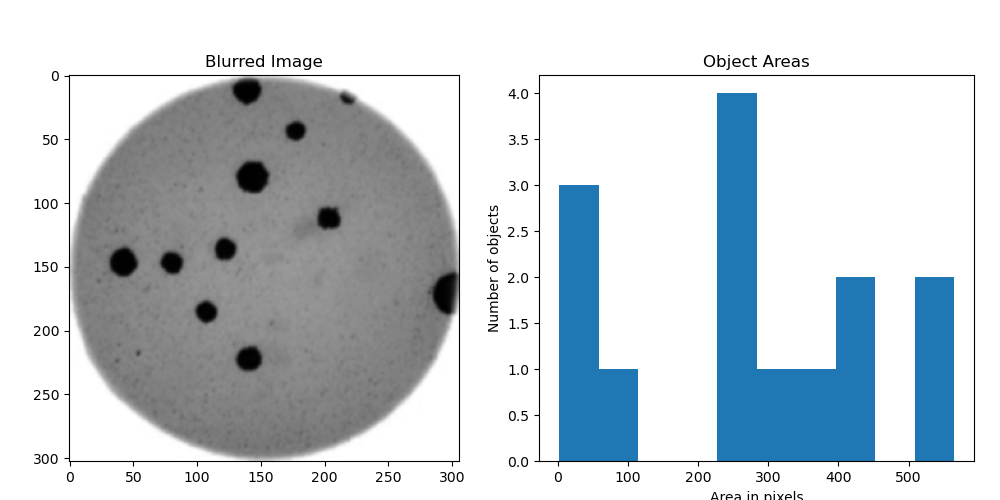

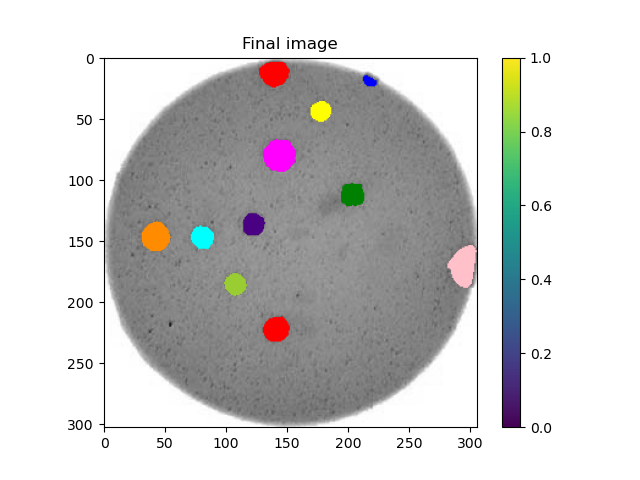

In [43]:
img1, count1 = component_analysis("data/colonies-01.tif", 1.0, 0.4, 2, 50.0)
print(f"Count:{count1}")

Count:67


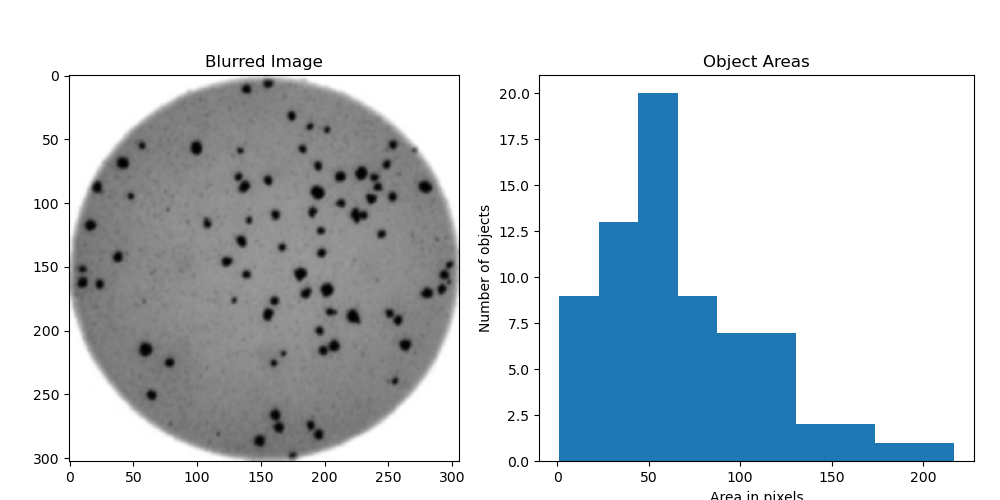

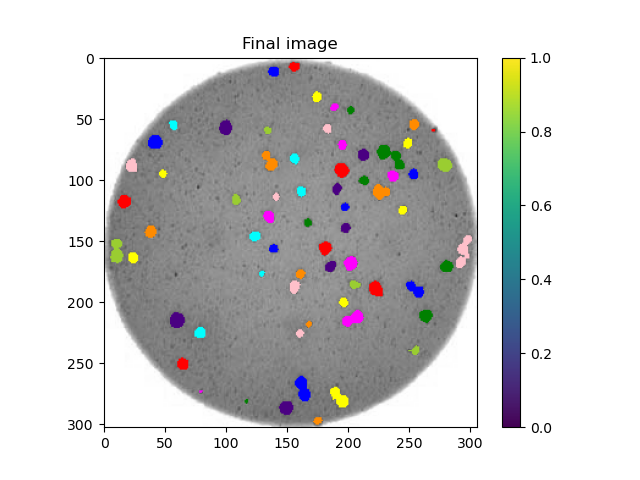

In [44]:
img2, count2 = component_analysis("data/colonies-02.tif", 1.0, 0.4, 2, 5.0)
print(f"Count:{count2}")

Count:246


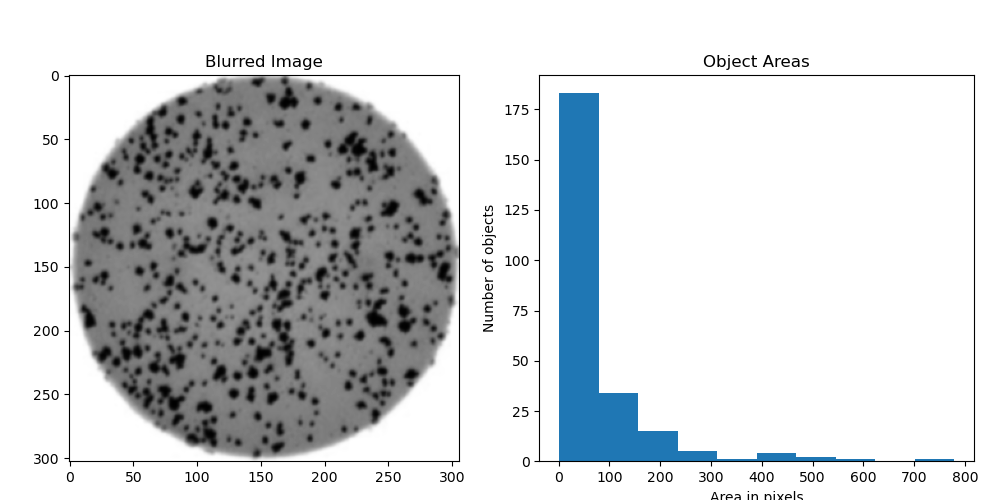

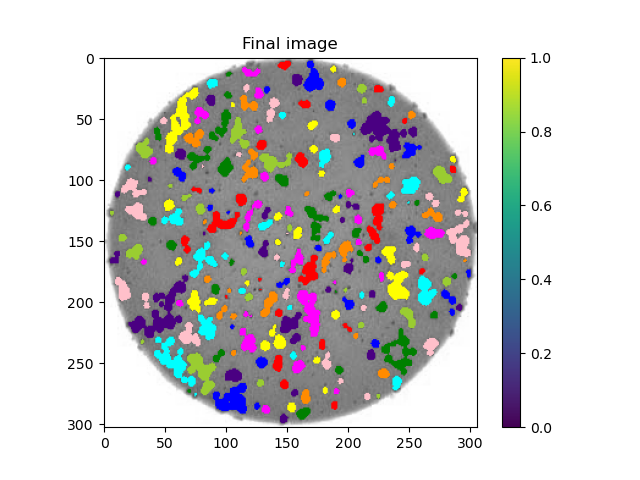

In [45]:
img3, count3 = component_analysis("data/colonies-03.tif", 1.0, 0.4, 2, 1.0)
print(f"Count:{count3}")

How to find out what is the minimum area, what threshold is, what blurring filter to use, what the sigma value should be -> all of this is variable and each gives you a certaon value. there is always a chance for "overfitting". Parameter tuning is required and it basically depends on how much fault tolerance you can have in the picture. Machine learning kind of bleeds into image processing as it can help find the right parameters.